In [1]:
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt


filename = "Waves_2023.txt"
file = pd.DataFrame(pd.read_csv(filename, delim_whitespace=True))

# Drop 999, 99, and NA values
df = file[['WVHT', 'APD', 'DPD', 'MWD', 'WTMP']].replace([9999.0,999.0, 99.0, 'NA'], np.nan).dropna()
df.shape

/var/folders/bm/1zbxfdz545vb2vms38bdffv80000gn/T/ipykernel_6772/3116783049.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  file = pd.DataFrame(pd.read_csv(filename, delim_whitespace=True))


(17276, 5)

In [3]:
pca = PCA(n_components=5)
pca.fit(df)

print(pca.explained_variance_ratio_)


[9.90777521e-01 5.67156404e-03 2.48887556e-03 9.73144741e-04
 8.88946139e-05]


In [4]:
print(np.abs(pca.components_))
plotData = pca.transform(df)

[[0.00414966 0.00632252 0.03483275 0.99911854 0.02217264]
 [0.02817253 0.35324348 0.92292703 0.02653793 0.14807698]
 [0.03730158 0.03477188 0.14552072 0.02692689 0.98767311]
 [0.12786551 0.92602029 0.35382026 0.01817485 0.02485407]
 [0.99068062 0.12828252 0.02504633 0.00158002 0.03828429]]


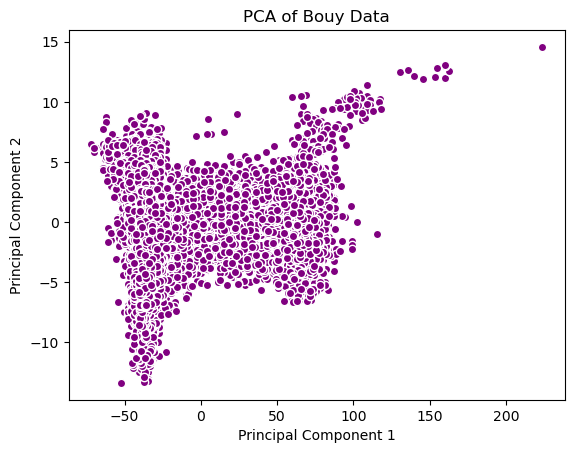

In [5]:
plt.scatter(plotData[:, 0], plotData[:, 1], color='purple', edgecolors='white')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Bouy Data')
plt.show()

/Users/paigewise/miniconda3/envs/Env_Data_Science/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/paigewise/miniconda3/envs/Env_Data_Science/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/paigewise/miniconda3/envs/Env_Data_Science/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/paigewise/miniconda3/envs/Env_Data_Science/lib/python3.12/si

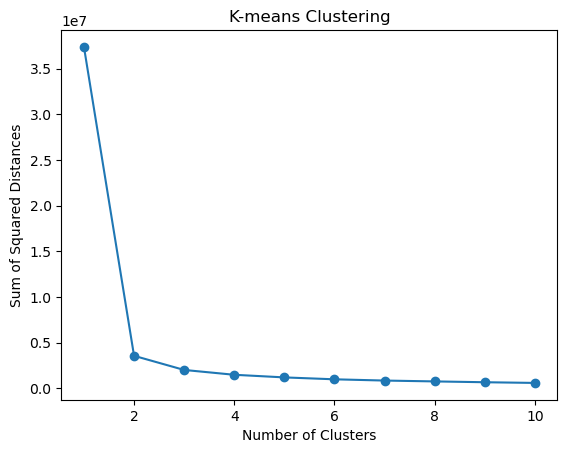

In [13]:
from sklearn.cluster import KMeans
df = [plotData[:,0],plotData[:,1]]
import matplotlib.pyplot as plt

# Define the range of number of clusters
num_clusters = range(1, 11)

# Initialize an empty list to store the sum of squared distances
ssd = []

# Perform K-means clustering for each number of clusters
for k in num_clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(plotData)
    ssd.append(kmeans.inertia_)

# Plot the sum of squared distances as a function of the number of clusters
plt.plot(num_clusters, ssd, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('K-means Clustering')
plt.show()

In [14]:
# The best number of clusters is 2 beacuse the sum of squared distances is minimized at 2 clusters shown as the "elbow" of the plot

/Users/paigewise/miniconda3/envs/Env_Data_Science/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


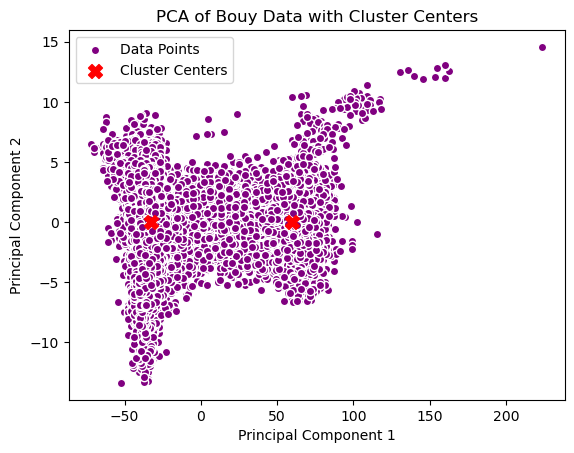

In [15]:
# Plot PC1 vs PC2
plt.scatter(plotData[:, 0], plotData[:, 1], color='purple', edgecolors='white', label='Data Points')

# Add cluster centers
kmeans = KMeans(n_clusters=2)
kmeans.fit(plotData)
cluster_centers = kmeans.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], color='red', marker='X', s=100, label='Cluster Centers')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Bouy Data with Cluster Centers')
plt.legend()
plt.show()


In [18]:
# Considering that only 2 clusters are needed, it makes sense visually since most of the data for PC1 is concentrated bewteen -50 and 0 and greater than 50 and centers around 0 for PC2. The cluster centers are also well placed in the middle of the data points.